In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from scipy.stats import mannwhitneyu
from sklearn.neighbors import LocalOutlierFactor

from scipy.stats import mannwhitneyu
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN 

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-07cl597w because the default path (/home/mpingol/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
data = pd.read_csv('data.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data['MonthlyRate']

0       19479
1       24907
2        2396
3       23159
4       16632
        ...  
1465    12290
1466    21457
1467     5174
1468    13243
1469    10228
Name: MonthlyRate, Length: 1470, dtype: int64

In [5]:
inliers = data[data['Attrition'] == 'No']
outliers = data[data['Attrition'] == 'Yes']
columns = data.drop('Attrition', axis=1).columns
ratio = len(inliers) / len(outliers)

print('inliers:  ', len(inliers))
print('outliers: ', len(outliers))
print('ratio:    ',ratio)

inliers:   1233
outliers:  237
ratio:     5.2025316455696204


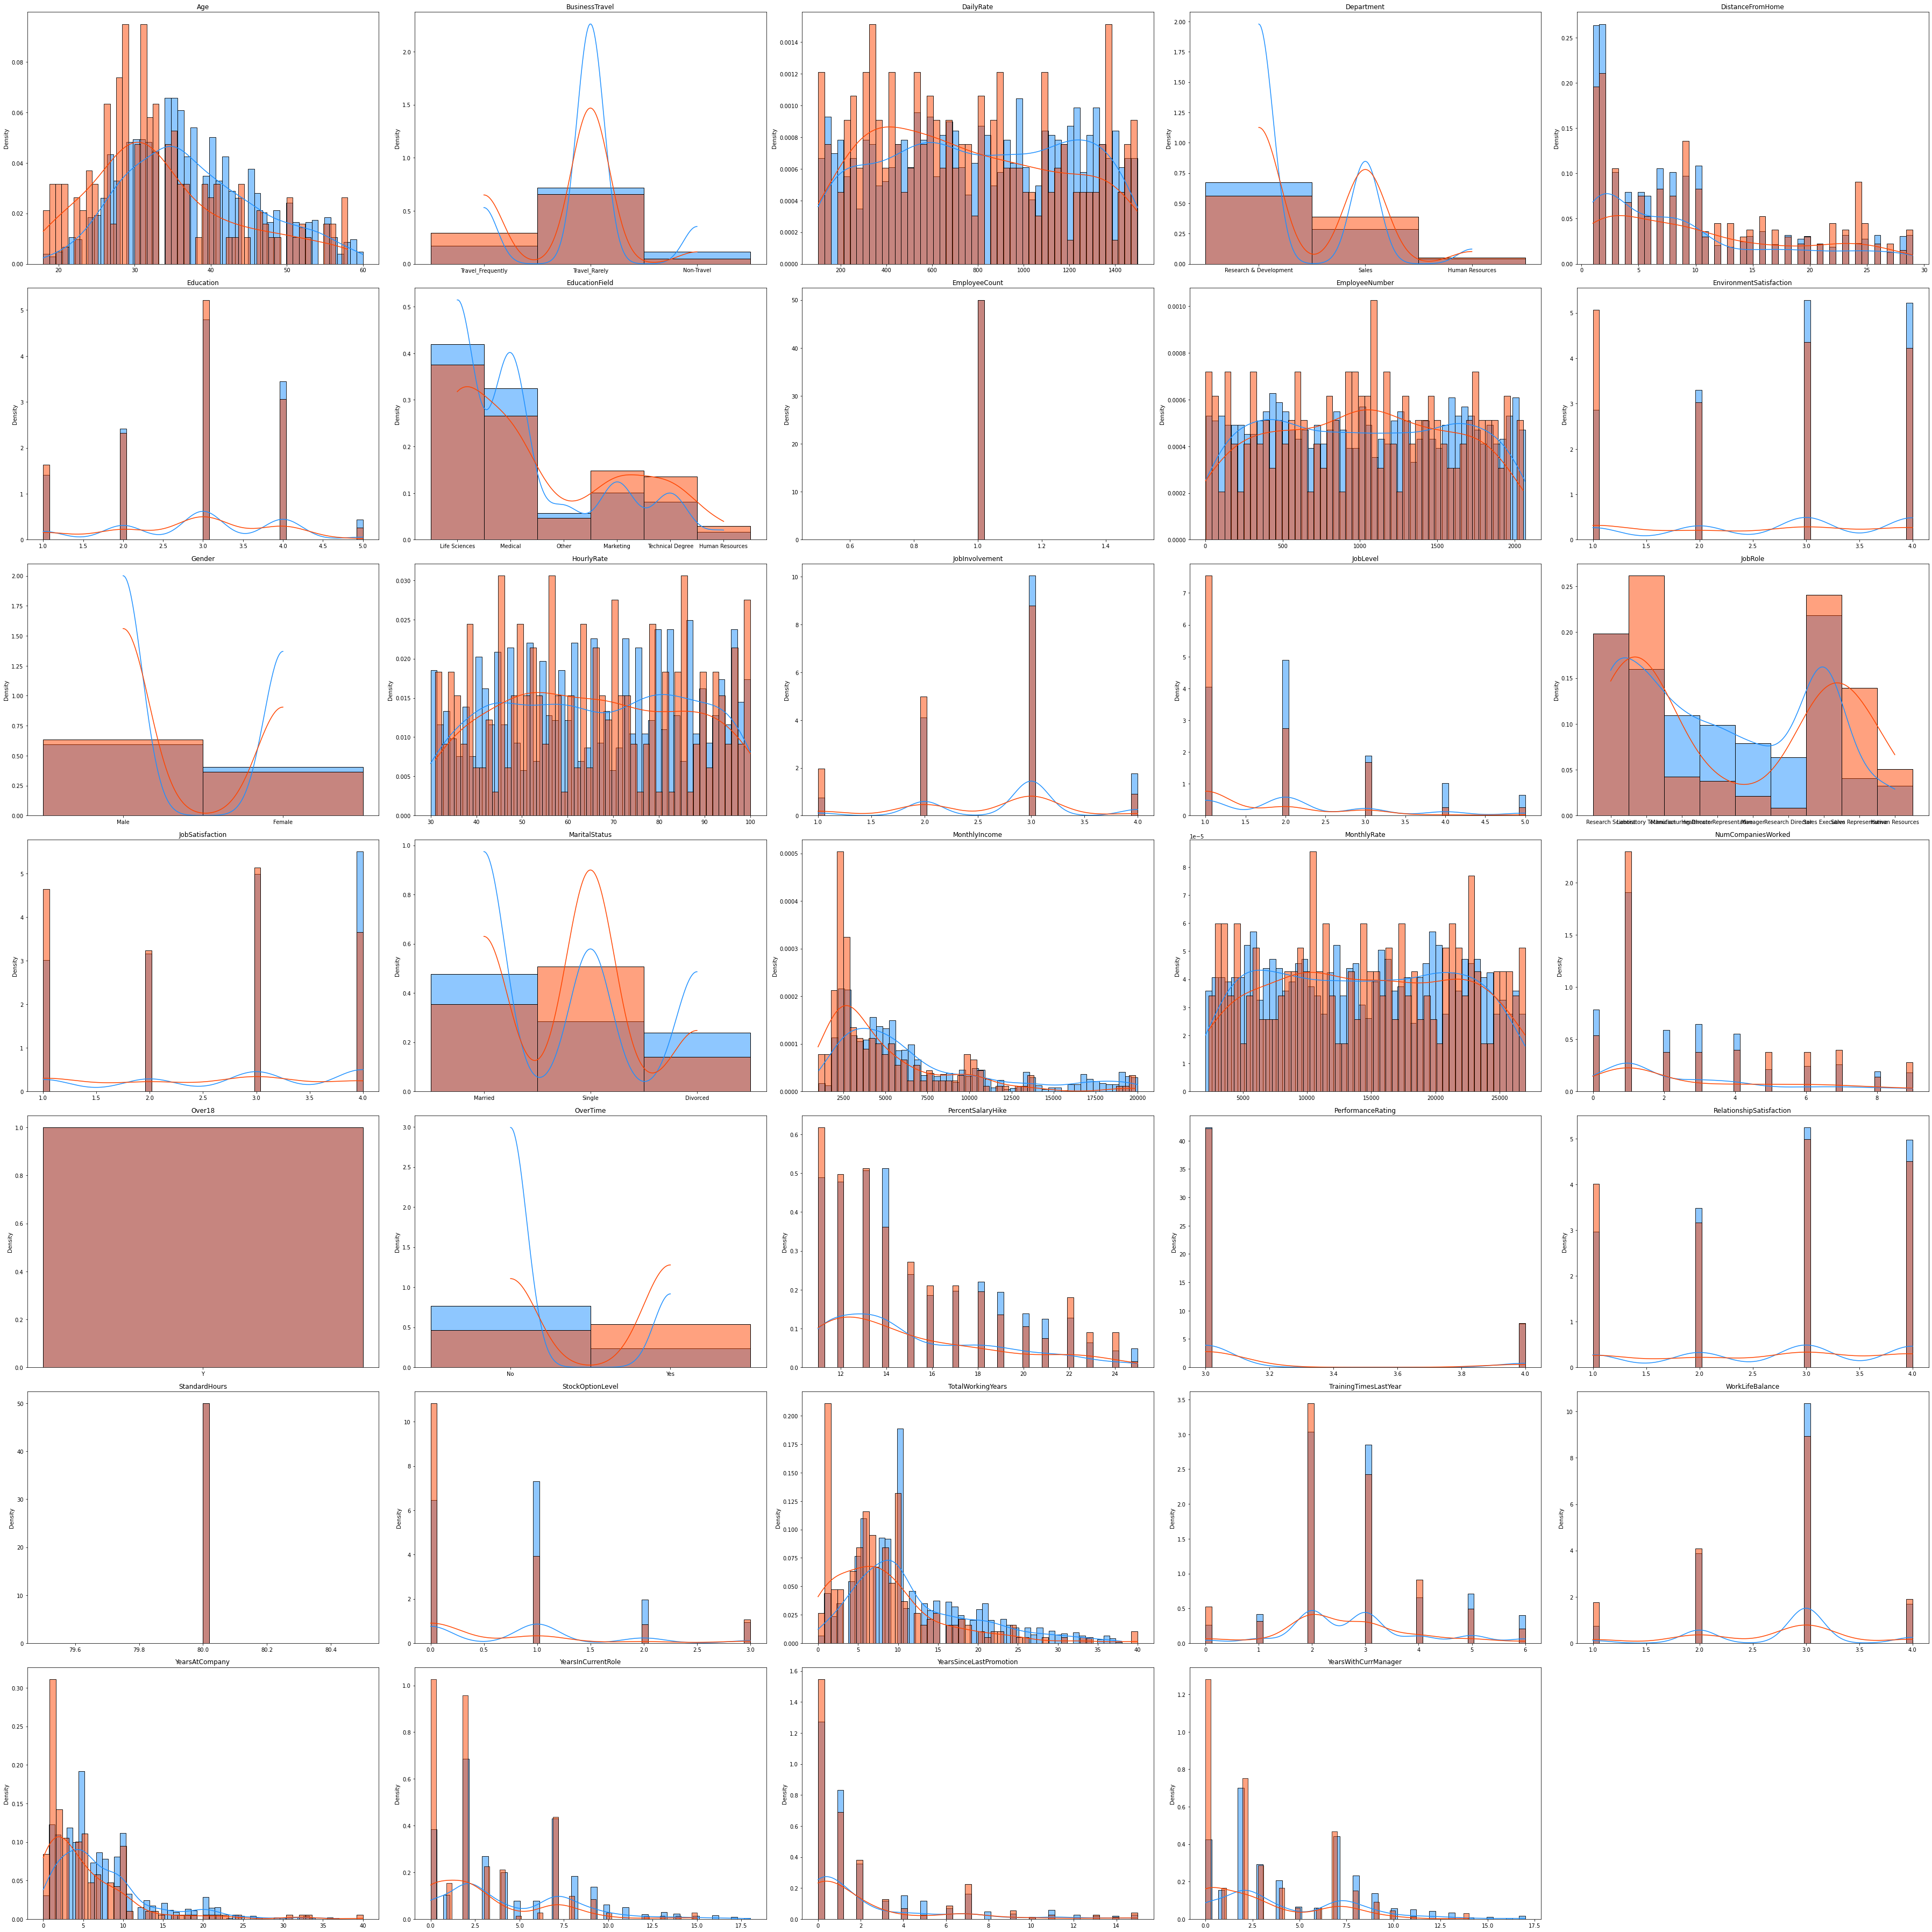

In [6]:
grid = gridspec.GridSpec(7, 5)
plt.figure(figsize=(50, 50))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(inliers[col], bins=50, color='dodgerblue', stat='density', kde=True)
    sns.histplot(outliers[col], bins=50, color='orangered', stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

In [7]:
data=data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

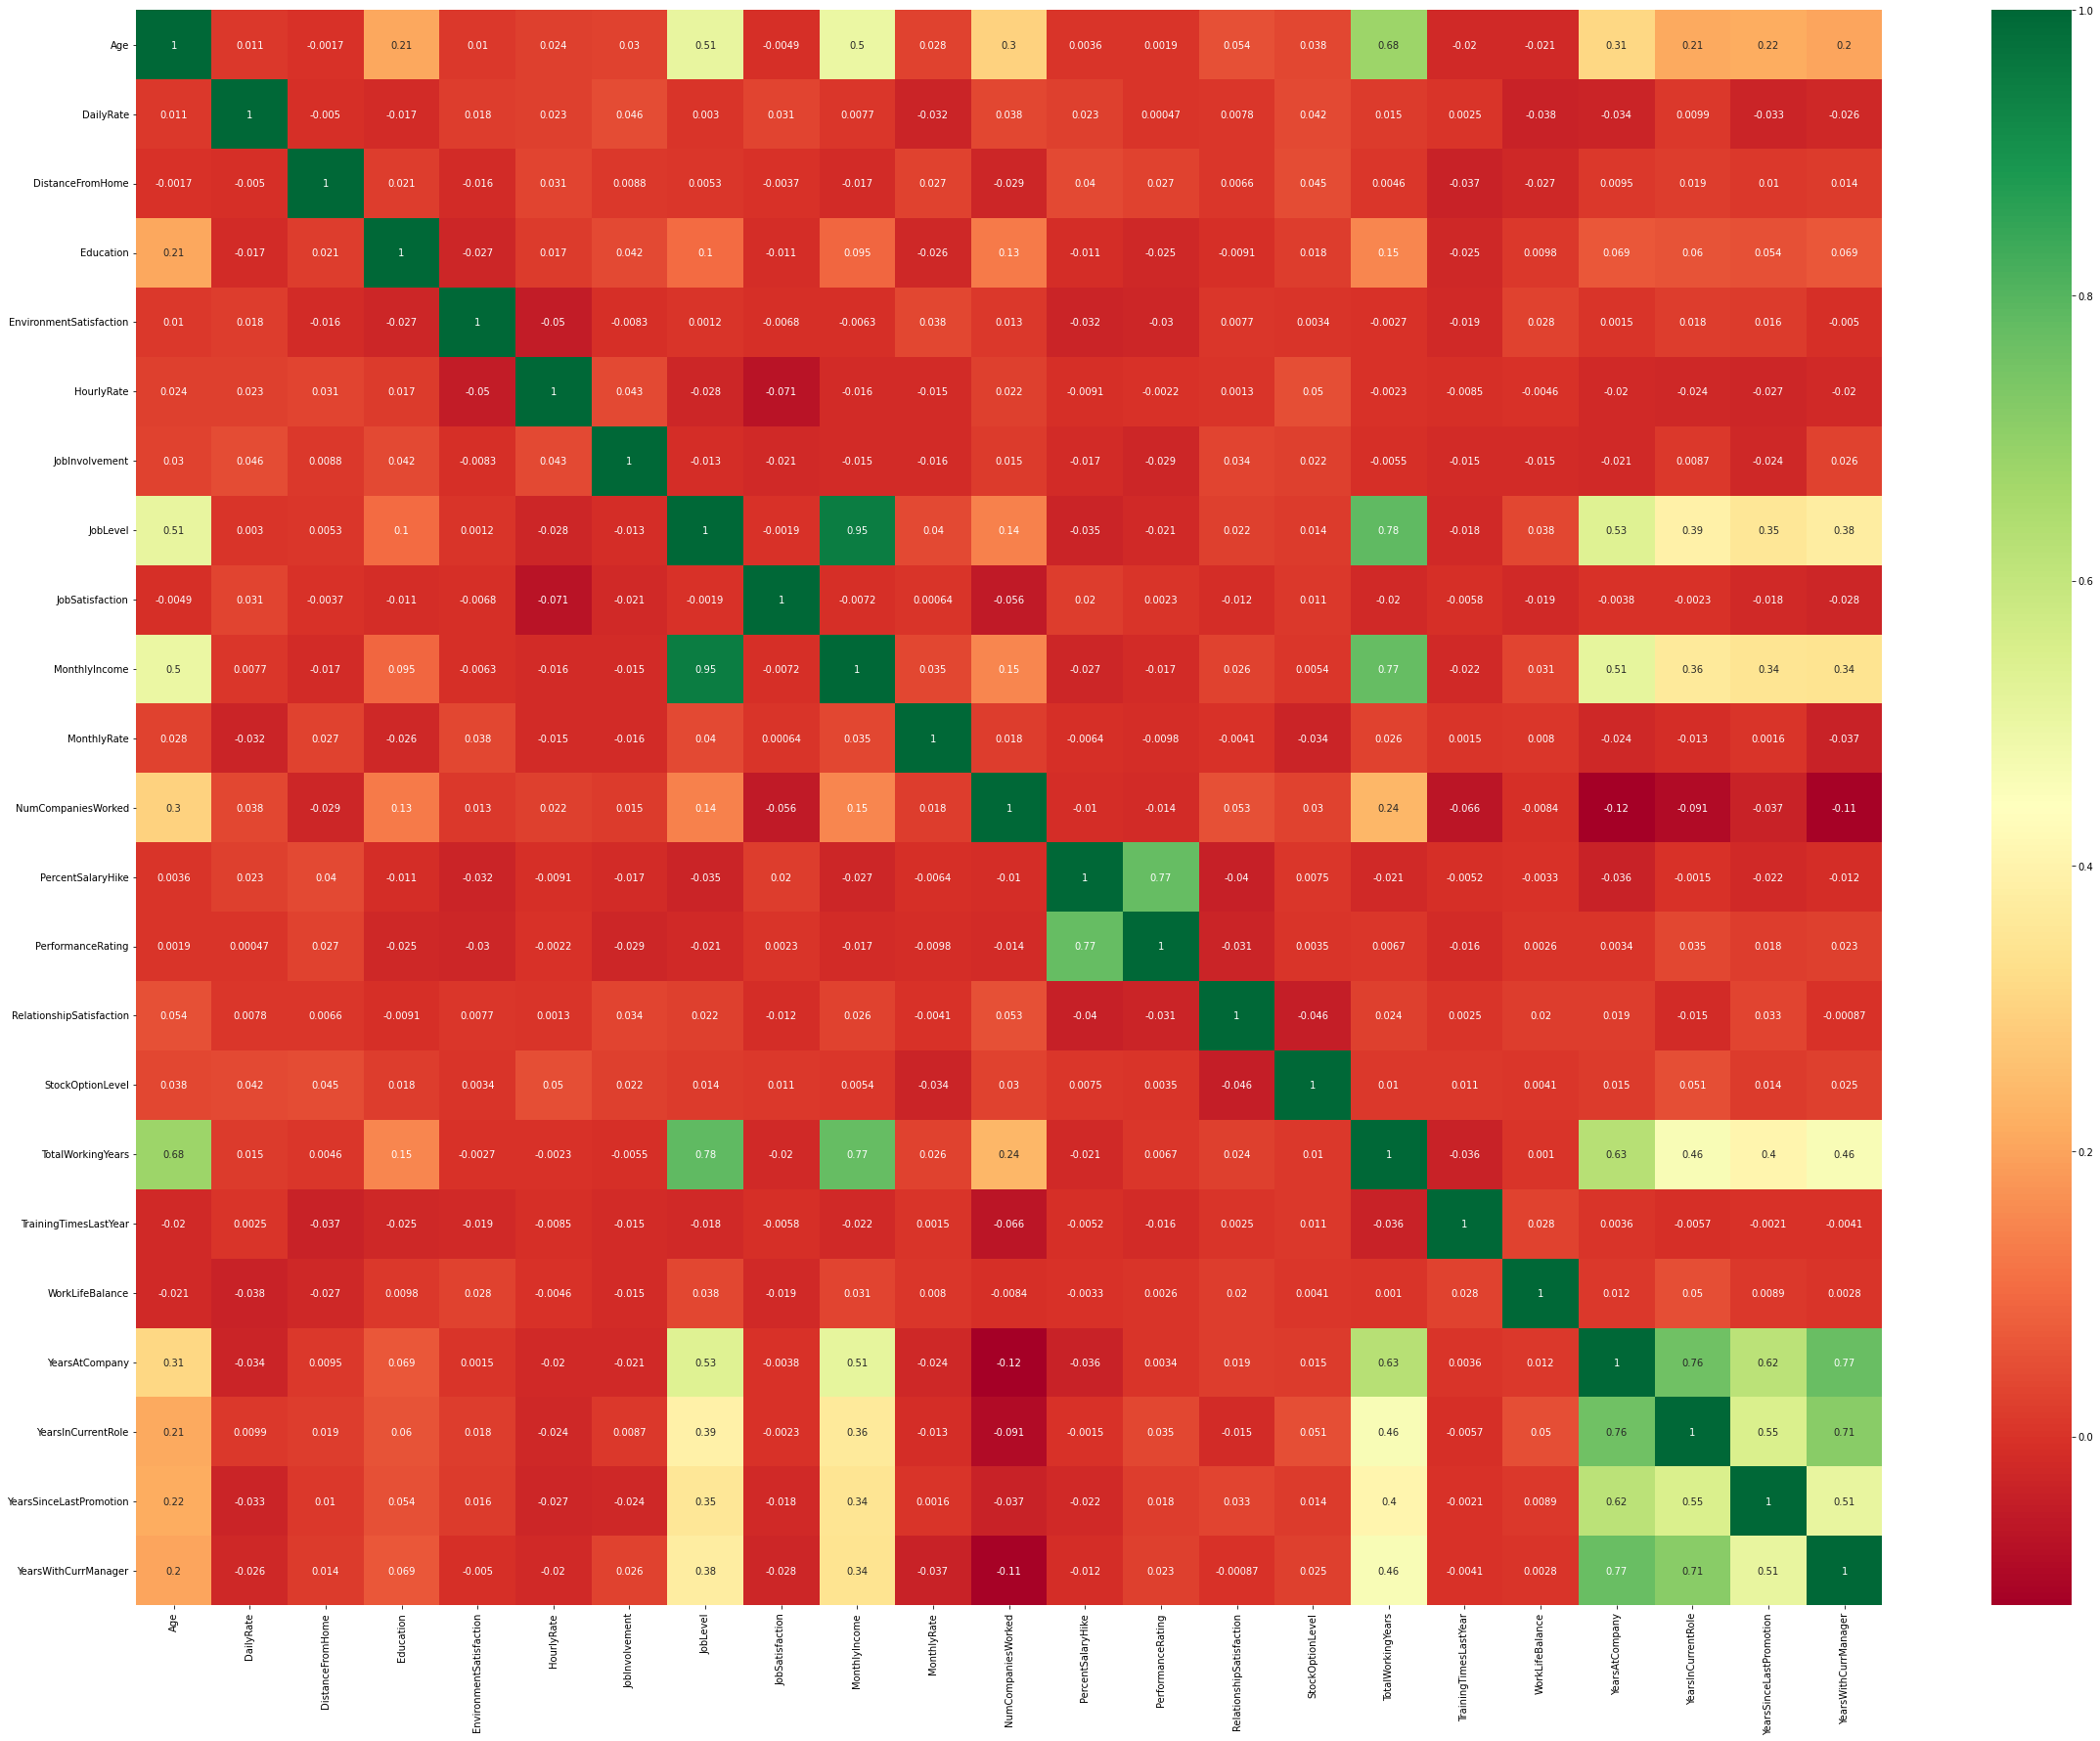

In [8]:
heatmap = data.corr()
top_feat = heatmap.index
plt.figure(figsize=(40,30))
p = sns.heatmap(data[top_feat].corr(),annot=True,cmap ='RdYlGn')

In [9]:
data.skew()

/tmp/ipykernel_1905/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [10]:
features = data.drop('Attrition', axis=1)
target = pd.get_dummies(data['Attrition'], drop_first=True)

In [11]:
cat = ['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'       
      ]

num = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
      ]

features_cat = features[cat]
features_num = features[num]

sscaler = StandardScaler()
features_num_scaled = sscaler.fit_transform(features_num.astype(np.float))
features_num_scaled = pd.DataFrame(data = features_num_scaled, 
                                   columns = features_num.columns)

features_cat_ohe = pd.get_dummies(features_cat, drop_first=False)

features_processed = pd.concat([features_num_scaled, features_cat_ohe], axis=1)

In [21]:
ada = ADASYN(random_state=42)
X, y = ada.fit_resample(features_processed, target['Yes'])

In [23]:
warnings.filterwarnings("ignore")

In [22]:
from sklearn.metrics import recall_score
import time

In [15]:
Number_trials=15

In [16]:
def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,21)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(recall_score(clf.predict(X_train), y_train))
            acc_test.append(recall_score(clf.predict(X_test), y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time] 

In [17]:
def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(recall_score(lr.predict(X_train), y_train))
            test_accuracy.append(recall_score(lr.predict(X_test), y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

In [18]:
def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(recall_score(svc.predict(X_train), y_train))
            test_accuracy.append(recall_score(svc.predict(X_test), y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]

In [19]:
def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(recall_score(svc.predict(X_train), y_train))
            test_accuracy.append(recall_score(svc.predict(X_test), y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

In [20]:
def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(recall_score(svc.predict(X_train), y_train))
            test_accuracy.append(recall_score(svc.predict(X_test), y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

['kNN', 0.8720964434330919, 'N_Neighbor = 2', 'NA', 187.22738814353943]
187.22738814353943 seconds
['Logistic (l2)', 0.954408389887492, 'C = 1000', 'EducationField_Medical', 676.3555891513824]
676.3555891513824 seconds
['Logistic (l1)', 0.954243238258268, 'C = 5', 'MaritalStatus_Divorced', 183.70219492912292]
183.70219492912292 seconds
['Linear SVM (l2)', 0.970222927817198, 'C = 5', 'MaritalStatus_Divorced', 78.21157002449036]
78.21157002449036 seconds
['Linear SVM (l1)', 0.963388131272042, 'C = 10', 'JobRole_Research Director', 157.70009994506836]
157.70009994506836 seconds
['Random Forest', 0.962405364723515, 'Max_features = 0.1', 'OverTime_No', 83.11066699028015]
83.11066699028015 seconds
['Gradient Boosting Method', 0.9478672252019327, 'Max_features = 0.5', 'OverTime_No', 40.04803705215454]
83.11066699028015 seconds


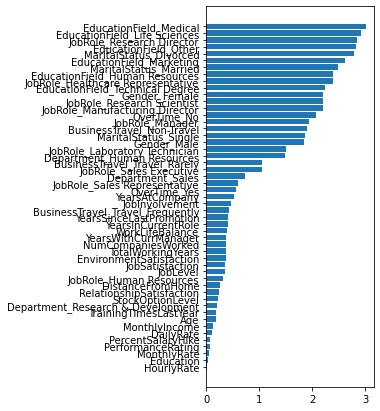

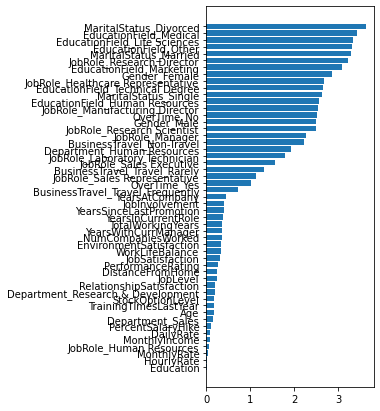

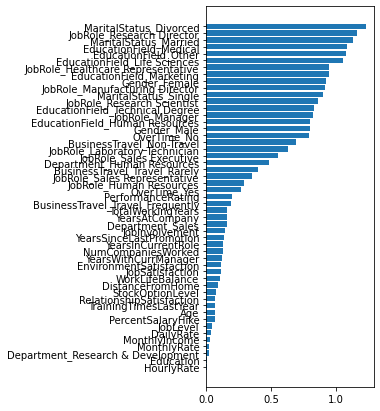

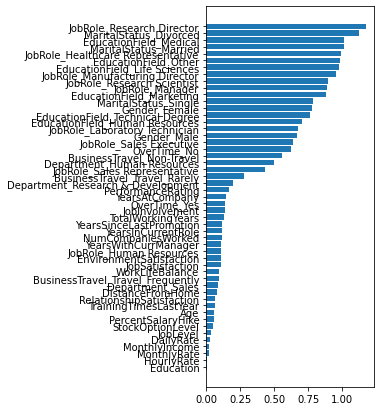

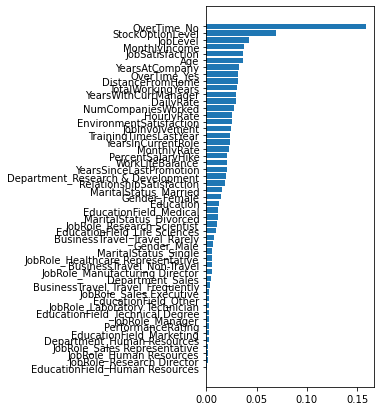

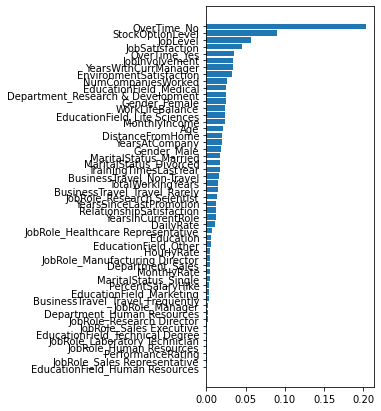

In [24]:
start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [25]:
cols = ['Machine Learning Method', 'Test Recall', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
results_df = pd.DataFrame(columns=cols)

results_df.loc[0] = a
results_df.loc[1] = b
results_df.loc[2] = c
results_df.loc[3] = d
results_df.loc[4] = e
results_df.loc[5] = f
results_df.loc[6] = g

results_df

,Machine Learning Method,Test Recall,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.872096,N_Neighbor = 2,NA,187.227388
1,Logistic (l2),0.954408,C = 1000,EducationField_Medical,676.355589
2,Logistic (l1),0.954243,C = 5,MaritalStatus_Divorced,183.702195
3,Linear SVM (l2),0.970223,C = 5,MaritalStatus_Divorced,78.211570
4,Linear SVM (l1),0.963388,C = 10,JobRole_Research Director,157.700100
5,Random Forest,0.962405,Max_features = 0.1,OverTime_No,83.110667
6,Gradient Boosting Method,0.947867,Max_features = 0.5,OverTime_No,40.048037


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[275  41]
 [  2 278]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       316
           1       0.87      0.99      0.93       280

    accuracy                           0.93       596
   macro avg       0.93      0.93      0.93       596
weighted avg       0.94      0.93      0.93       596



In [31]:
lr1 = LogisticRegression(C=1000, penalty='l1', solver='liblinear')
lr1.fit(X_train, y_train)
y_pred_lr1 = lr1.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr1))
print(classification_report(y_test, y_pred_lr1))

[[310   6]
 [ 39 241]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       316
           1       0.98      0.86      0.91       280

    accuracy                           0.92       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.93      0.92      0.92       596



In [32]:
lr2 = LogisticRegression(C=1000, penalty='l2', dual=False)
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr2))
print(classification_report(y_test, y_pred_lr2))

[[311   5]
 [ 38 242]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       316
           1       0.98      0.86      0.92       280

    accuracy                           0.93       596
   macro avg       0.94      0.92      0.93       596
weighted avg       0.93      0.93      0.93       596



In [36]:
svcl1 = LinearSVC(C=5, penalty='l1', loss='squared_hinge', dual=False)
svcl1.fit(X_train, y_train)
y_pred_svcl1 = svcl1.predict(X_test)

print(confusion_matrix(y_test, y_pred_svcl1))
print(classification_report(y_test, y_pred_svcl1))

[[310   6]
 [ 41 239]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       316
           1       0.98      0.85      0.91       280

    accuracy                           0.92       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.93      0.92      0.92       596



In [37]:
svcl2 = LinearSVC(C=10, penalty='l2')
svcl2.fit(X_train, y_train)
y_pred_svcl2 = svcl2.predict(X_test)

print(confusion_matrix(y_test, y_pred_svcl2))
print(classification_report(y_test, y_pred_svcl2))

[[312   4]
 [ 50 230]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       316
           1       0.98      0.82      0.89       280

    accuracy                           0.91       596
   macro avg       0.92      0.90      0.91       596
weighted avg       0.92      0.91      0.91       596



In [39]:
rf = RandomForestClassifier(n_estimators=100, max_features=0.1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[300  16]
 [ 25 255]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       316
           1       0.94      0.91      0.93       280

    accuracy                           0.93       596
   macro avg       0.93      0.93      0.93       596
weighted avg       0.93      0.93      0.93       596



In [40]:
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=0.5)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

[[300  16]
 [ 29 251]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       316
           1       0.94      0.90      0.92       280

    accuracy                           0.92       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.93      0.92      0.92       596

